# 1 Business Understanding

### Problem Overview

Customer churn is the act of customers discontinuing their relationship with a company.It represents a major challenge for telecommunications businesses. Acquiring new customers is significantly more expensive than retaining existing ones, and high churn rates directly impact revenue, profitability, and brand perception.

In the increasingly competitive telecom industry, companies must proactively identify customers at risk of churning and take steps to retain them. Traditional retention efforts, such as blanket discount offers or mass outreach, are often inefficient and costly. A data-driven, predictive approach offers a more effective solution.

### Business Objective

This project aims to develop a machine learning classification model to **predict whether a customer is likely to churn**, based on their historical and behavioral data. By identifying at-risk customers before they churn, the business can:

- Reduce customer acquisition costs by improving retention
- Optimize marketing and customer service interventions
- Personalize offers to customers who show warning signs
- Understand key drivers of churn for long-term strategic planning

### Stakeholders

The primary stakeholders for this project include:

- **Customer Retention Team:** Needs early warnings to take preventive actions (e.g., loyalty offers).
- **Marketing Team:** Can use model insights to target at-risk segments with personalized campaigns.
- **Product Managers:** Gain insights on which service features drive churn to improve user experience.
- **Senior Leadership:** Interested in revenue retention and strategic decision-making based on customer behavior.

### Success Criteria

The model will be considered successful if it can:

- Accurately classify customers as likely to churn or not (using precision, recall, and F1-score).
- Provide interpretable results that highlight the most influential features.
- Enable actionable recommendations to reduce churn.

Ultimately, this project supports data-driven decision-making and cost-effective customer engagement in a highly competitive market.


# 2. Data Understanding

## Dataset Overview

The dataset used in this project is from **SyriaTel**, a telecommunications company. It contains customer demographic, behavioral, and account-related features. The target variable is Churn indicating whether a customer has left the service.

- **Type**: Tabular
- **Target variable**: Churn (Binary: 1 = Churned, 0 = Retained)
- **Rows**: [Insert number of records]
- **Columns**: [Insert number of features]
- **Format**: CSV

## Key Features

The features fall into the following categories:

- **Demographics**: gender, SeniorCitizen, Partner, Dependents
- **Service Features**: PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport,StreamingTV, StreamingMovies
- **Account Information**: tenure, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges
- **Target Variable**: Churn

## Data Types

- **Numerical**: tenure, MonthlyCharges, TotalCharges, SeniorCitizen
- **Categorical**: Contract, InternetService, PaymentMethod, etc.
- **Boolean** (Yes/No): Several columns may be encoded as strings and will need encoding.
- **Target**: Churn (Binary)

## First Look at the Data

Before modeling, we will:

- Inspect data types and basic statistics
- Check for missing or malformed data
- Understand value distributions
- Identify categorical and numerical features
- Explore class imbalance in the target variable

This exploration helps us determine preprocessing strategies such as encoding, scaling, or imputation.

## Why This Step Matters

Understanding your dataset is essential for:

- **Avoiding data leakage**
- **Choosing the right model and metrics**
- **Improving interpretability**
- **Avoiding common pitfalls like inconsistent data types, unexpected nulls, or mislabeled targets**


# 3 Data Preparation
### Load the Dataset
We begin by importing necessary libraries and loading the CSV file from the project’s data/ directory.

In [56]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("../data/bigml_59c28831336c6604c800002a.csv")

# Display the shape and the first few rows
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (3333, 21)


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Explore Dataset Structure
Let’s take a first look at the structure, data types, and summary of values.

In [57]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [58]:
# Check for missing values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [59]:
# Summary statistics
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### Data Cleaning
Before building predictive models, we must ensure the dataset is clean, consistent, and ready for machine learning. This process involves fixing missing or inconsistent data, standardizing formats, and preparing categorical variables.

### Standardize Column Names

In [60]:
#Clean column names: lowercase and replace spaces with underscores
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Confirm changes
print(df.columns.tolist())


['state', 'account_length', 'area_code', 'phone_number', 'international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'customer_service_calls', 'churn']


### Clean and Encode Categorical Features
You mentioned features like international plan, voice mail plan, and churn, which are currently encoded as strings (Yes/No). Let’s convert them to binary (1/0).

In [61]:
# Identify columns with Yes/No values
yes_no_cols = ['international_plan', 'voice_mail_plan', 'churn']

# Convert Yes/No to 1/0
for col in yes_no_cols:
    if df[col].dropna().isin(['Yes', 'No']).all():
        df[col] = df[col].map({'Yes': 1, 'No': 0})


### Final Dataset Overview

In [62]:
# Final structure check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   phone_number            3333 non-null   object 
 4   international_plan      3333 non-null   object 
 5   voice_mail_plan         3333 non-null   object 
 6   number_vmail_messages   3333 non-null   int64  
 7   total_day_minutes       3333 non-null   float64
 8   total_day_calls         3333 non-null   int64  
 9   total_day_charge        3333 non-null   float64
 10  total_eve_minutes       3333 non-null   float64
 11  total_eve_calls         3333 non-null   int64  
 12  total_eve_charge        3333 non-null   float64
 13  total_night_minutes     3333 non-null   float64
 14  total_night_calls       3333 non-null   

In [63]:
# Preview cleaned data
df.sample(5)

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
1424,WA,78,408,372-7326,no,no,0,140.7,77,23.92,...,114,16.59,252.9,107,11.38,11.7,5,3.16,0,False
433,SC,78,415,411-7390,no,no,0,155.0,106,26.35,...,101,14.90,155.6,125,7.00,11.8,5,3.19,2,False
1161,MN,40,510,354-2189,yes,no,0,170.7,55,29.02,...,108,15.22,281.9,89,12.69,8.2,9,2.21,3,False
2172,AL,132,408,350-9318,no,no,0,222.4,85,37.81,...,76,14.06,208.4,97,9.38,11.2,4,3.02,0,False
2644,AL,76,415,367-8156,no,no,0,179.2,85,30.46,...,66,18.95,188.2,113,8.47,12.4,2,3.35,0,False


# 4 Exploratory Data Analysis (EDA)
The main goal at this phase is to understand feature distributions, relationships with churn, and uncover potential drivers behind customer attrition. This helps guide feature selection and modeling.

### Imports for EDA

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set aesthetics
sns.set(style="whitegrid")
plt.style.use("ggplot")

# Enable full-width plots in Jupyter
%matplotlib inline


### Target Variable Distribution (churn)

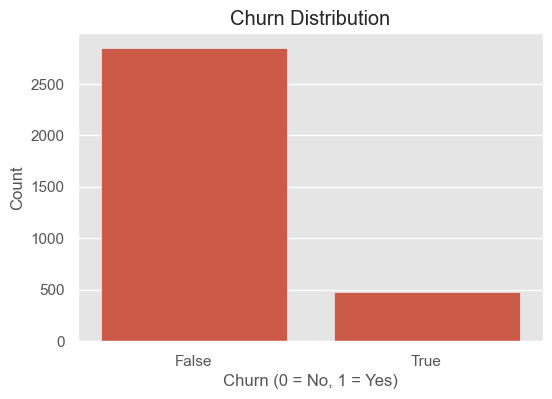

In [65]:
# Plot churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df)
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


This shows class imbalance (how many customers churned vs stayed). A significant imbalance may affect model performance and require stratification or resampling techniques.

### Numerical Feature Distributions

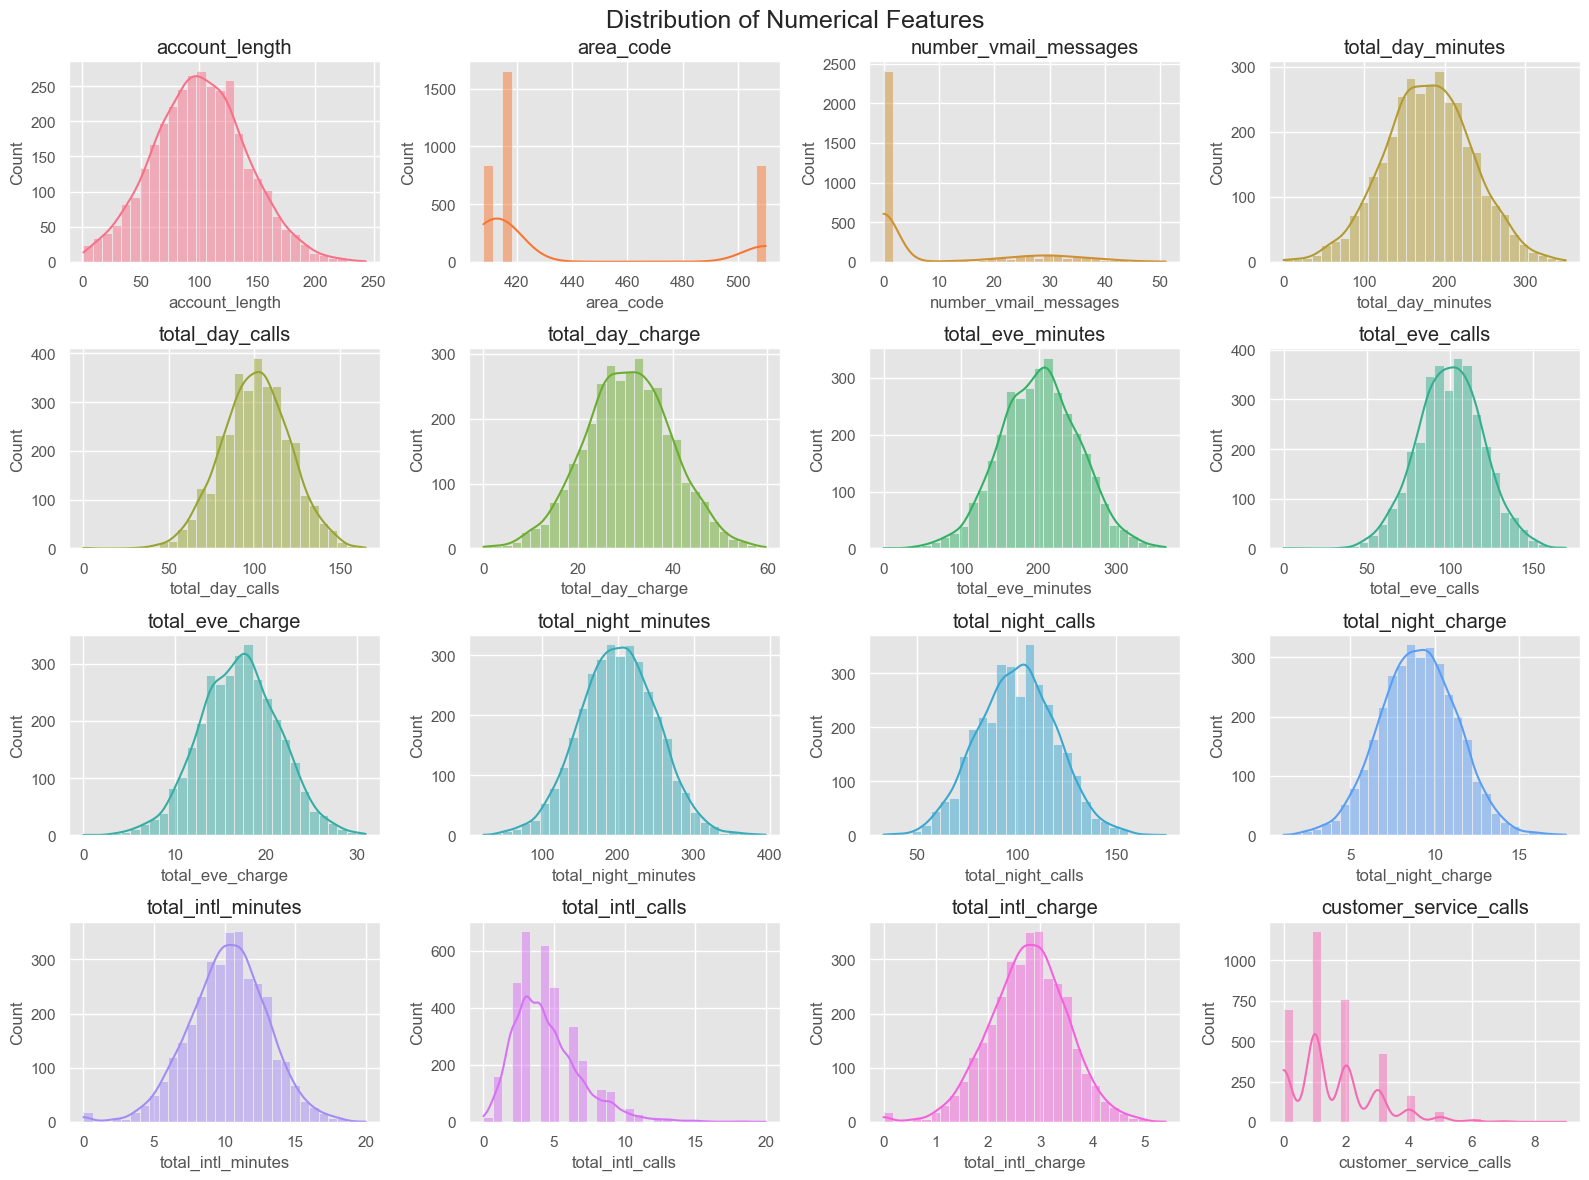

In [67]:
# Get numeric columns excluding 'churn'
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = [col for col in numeric_cols if col != 'churn']

# Generate a list of unique colors
colors = sns.color_palette("husl", len(numeric_cols))  # husl gives visually distinct hues

# Plot histograms
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], bins=30, color=colors[i-1], kde=True)
    plt.title(col)
    plt.tight_layout()

plt.suptitle("Distribution of Numerical Features", fontsize=18)
plt.tight_layout()
plt.show()
